In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import linalg
from scipy import optimize
import pandas as pd
import datetime
import math as m

## 31. Аппроксимация данных. Логистическая функция. 
[Weiner B. Discovering Psychology. 1977]

В таблице представлены средние значения количества слов $y$, которыми владеет ребенок в заданном возрасте $x$.
```
 1.0        3
 1.5       22
 2.0      272
 2.5      446
 3.0      896
 3.5     1222
 4.0     1540
 4.5     1870
 5.0     2072
 6.0     2562
```
Построить линейную $y = \beta_0 + \beta_1 x$ и две логистические модели: 
$$
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 t}},
\qquad
y = \frac{\beta_0}{1 + \beta_1 e^{-\beta_2 (t - t_0)}},
$$
аппроксимирующие данные.    
Найти общую ошибку в каждом из этих случаев и сравнить результаты

ввод данных и их илюстрация

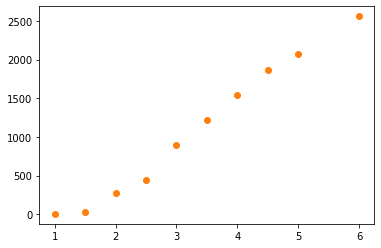

In [3]:
x = np.array([1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0])
y = np.array([3,22,272,446,896,1222,1540,1870,2072,2562])
plt.plot(x,y,'o',color = 'tab:orange')
pass

функции

In [167]:
def fun_one(t, b0,b1):
    return b0 + t * b1

In [168]:
def fun_two(t, b0,b1,b2):
    return b0 / (1 + b1 * np.exp(-b2 * t))

In [182]:
def fun_three(t, t0, b0,b1,b2):
    return b0 / (1 + b1 * np.exp(-b2 * (t - t0)))

In [183]:
m = len(x)

определяю коэффициенты

In [190]:
params0, _ = optimize.curve_fit(fun_one, x, y)
alpha1, alpha2 = params0
#alpha2, alpha1 = np.polyfit(x, y, 1)
params1, _ = optimize.curve_fit(fun_two, x, y)
beta2, beta1, beta0 = params1
params2, _ = optimize.curve_fit(fun_three, x, y)
y0, gama2, gama1, gama0 = params2
#bet2, beta1, beta0 = np.polyfit(x, y, 2)

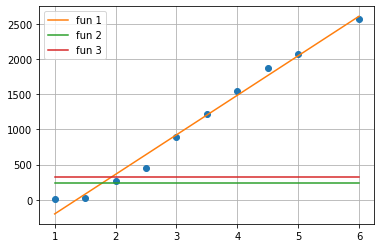

In [191]:
tt = np.linspace(np.min(x), np.max(x), 10)
plt.plot(x,y,'o')
plt.plot(tt, fun_one(tt,alpha1,alpha2), label='fun 1')
plt.plot(tt, fun_two(tt, beta0, beta1, beta2), label='fun 2')
plt.plot(tt, fun_three(tt, y0, gama0, gama1, gama2), label='fun 3')
plt.legend()
plt.grid()
pass

у меня выходит, что коэффициенты слишком большие для знаминателя, т.к. знаменатель = 1